In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [3]:
# remove columns unnamed 0 , Booking_ID
df.drop(columns=['Unnamed: 0','Booking_ID'], axis=1,inplace=True)

In [4]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
df.shape


(29020, 18)

In [6]:
# Check for duplicate value
df.duplicated().sum()

np.int64(7661)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(21359, 18)

In [9]:
#Check for nan value
df.isna().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0
arrival_month,0


There is no Null value in the dataset , we can proceed ...


In [10]:
column_name = df.columns

for col in column_name:
  print(f"column Name :{col} and datatype :{df[col].dtype}")
  print(df[col].value_counts())
  print('----------------------------------------------------')

column Name :no_of_adults and datatype :int64
no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64
----------------------------------------------------
column Name :no_of_children and datatype :int64
no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64
----------------------------------------------------
column Name :no_of_weekend_nights and datatype :int64
no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64
----------------------------------------------------
column Name :no_of_week_nights and datatype :int64
no_of_week_nights
2     5894
1     5833
3     4628
4     1980
0     1492
5     1169
6      136
7       81
8       43
10      41
9       24
11      12
15       7
12       6
14       5
13       4
16       2
17       2
Name: count, dtype: int64
----------------------------------------------------
column Name :type_of_me

Now we will understand the dataset by there frequency .

1. no_of_adults - Mostly 2 adults visit the hotel which mean we guess that might be a couple who go for trip.
2. no_of_children - Mostly 0 children which refer the above column what we guess is correct . And there is a chance of children of 1257 in the dataset which means Families are also visiting the hotel frequently.
3. no_of_weekend_nights - Mostly of the customer doesn't stay in weekend_nights and couples and single are staying weekend_night in second most frequent in the dataset.
4. no_of_week_nights - Mostly customer stays 2 week nights followed by 1 and 3 week night stay.
5. type_of_meal_plan - Mostly number of customer choose meal plan 1 has their choice and second most of the customer doesn't prefer the meal in the hotel.
6. required _car_parking_space - 98% of customer doesn't nedd car_parking they might use public transport or bikes .
7. room_type_reserved - Mostly of the customer prefer Room_Type_1 which is suite for 2 person stays. And there are 7 Room type present in the hotel.
8. lead_time - Customer how book the room with 1 to 10 lead time have confirmly visit or stay in the hotel. Those who beyhond 30 days or more mostly cancelled the booking which is the important feature need to pay attention.
9. arrival_year - This dataset contain customers details from 2017 to 2018 and most of the customer are from 2018 data. And we can say that number of customer increase from the previous year which is Good sign.
10. arrival_month - Most of the customer visit in the month of oct,sept,August and descember .
11. arrival_data - Most of the customer comes in the date of 19,26 .
12. market_segment_type - There are 5 market segment from that online booking are most frequently occurs.
13. repeated_guest - Most o repeated guest which mean one time visit to the hotel.
14. no_of_previous_cancellations - Most of time 0 previous cancellation is happend .
15. no_of_previous_bookings_not_canceled - It is 0 here too .
16. average_price_per_room - average price of the room from  65.00 to 118.00 and above based the rome type and days .
17. no_of_special_request - Mostly 0 special request and second most is 1 special request made by the customer while booking .
18. booking_status - which is our target column mostly not_cancelling is high compare to cancelling . And it show that our dataset is imbalance in classes ie, most of the customers are Not_cancelled and half of the customer from the non_concelled customers are cancelled .


Our data is Imbalance .

In [11]:
# categorical column list
cat_col = df.select_dtypes(include='object').columns
print(f"categorical column : {cat_col}")

# Numerical column list
num_col = df.select_dtypes(exclude='object').columns
print(f"numerical column : {num_col}")

categorical column : Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')
numerical column : Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


### Data Analysis

In [12]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


Univariate Analysis of Numerical columns.

In [13]:
def num_plot_dist(df, num_features):
  fig,ax = plt.subplots(len(num_features),2,figsize=(15,30))
  if len(num_features) == 1:
    ax = [ax]
  for i,feature in enumerate(num_features):
    sns.histplot(data=df,x=feature,ax=ax[i][0],kde=True,palette="Blues")
    ax[i][0].set_title(f"Histogram for {feature}")
    sns.boxplot(data=df,x=feature,ax=ax[i][1],palette="Blues")
    ax[i][1].set_title(f"Boxplot for {feature}")
  plt.tight_layout()
  plt.show()


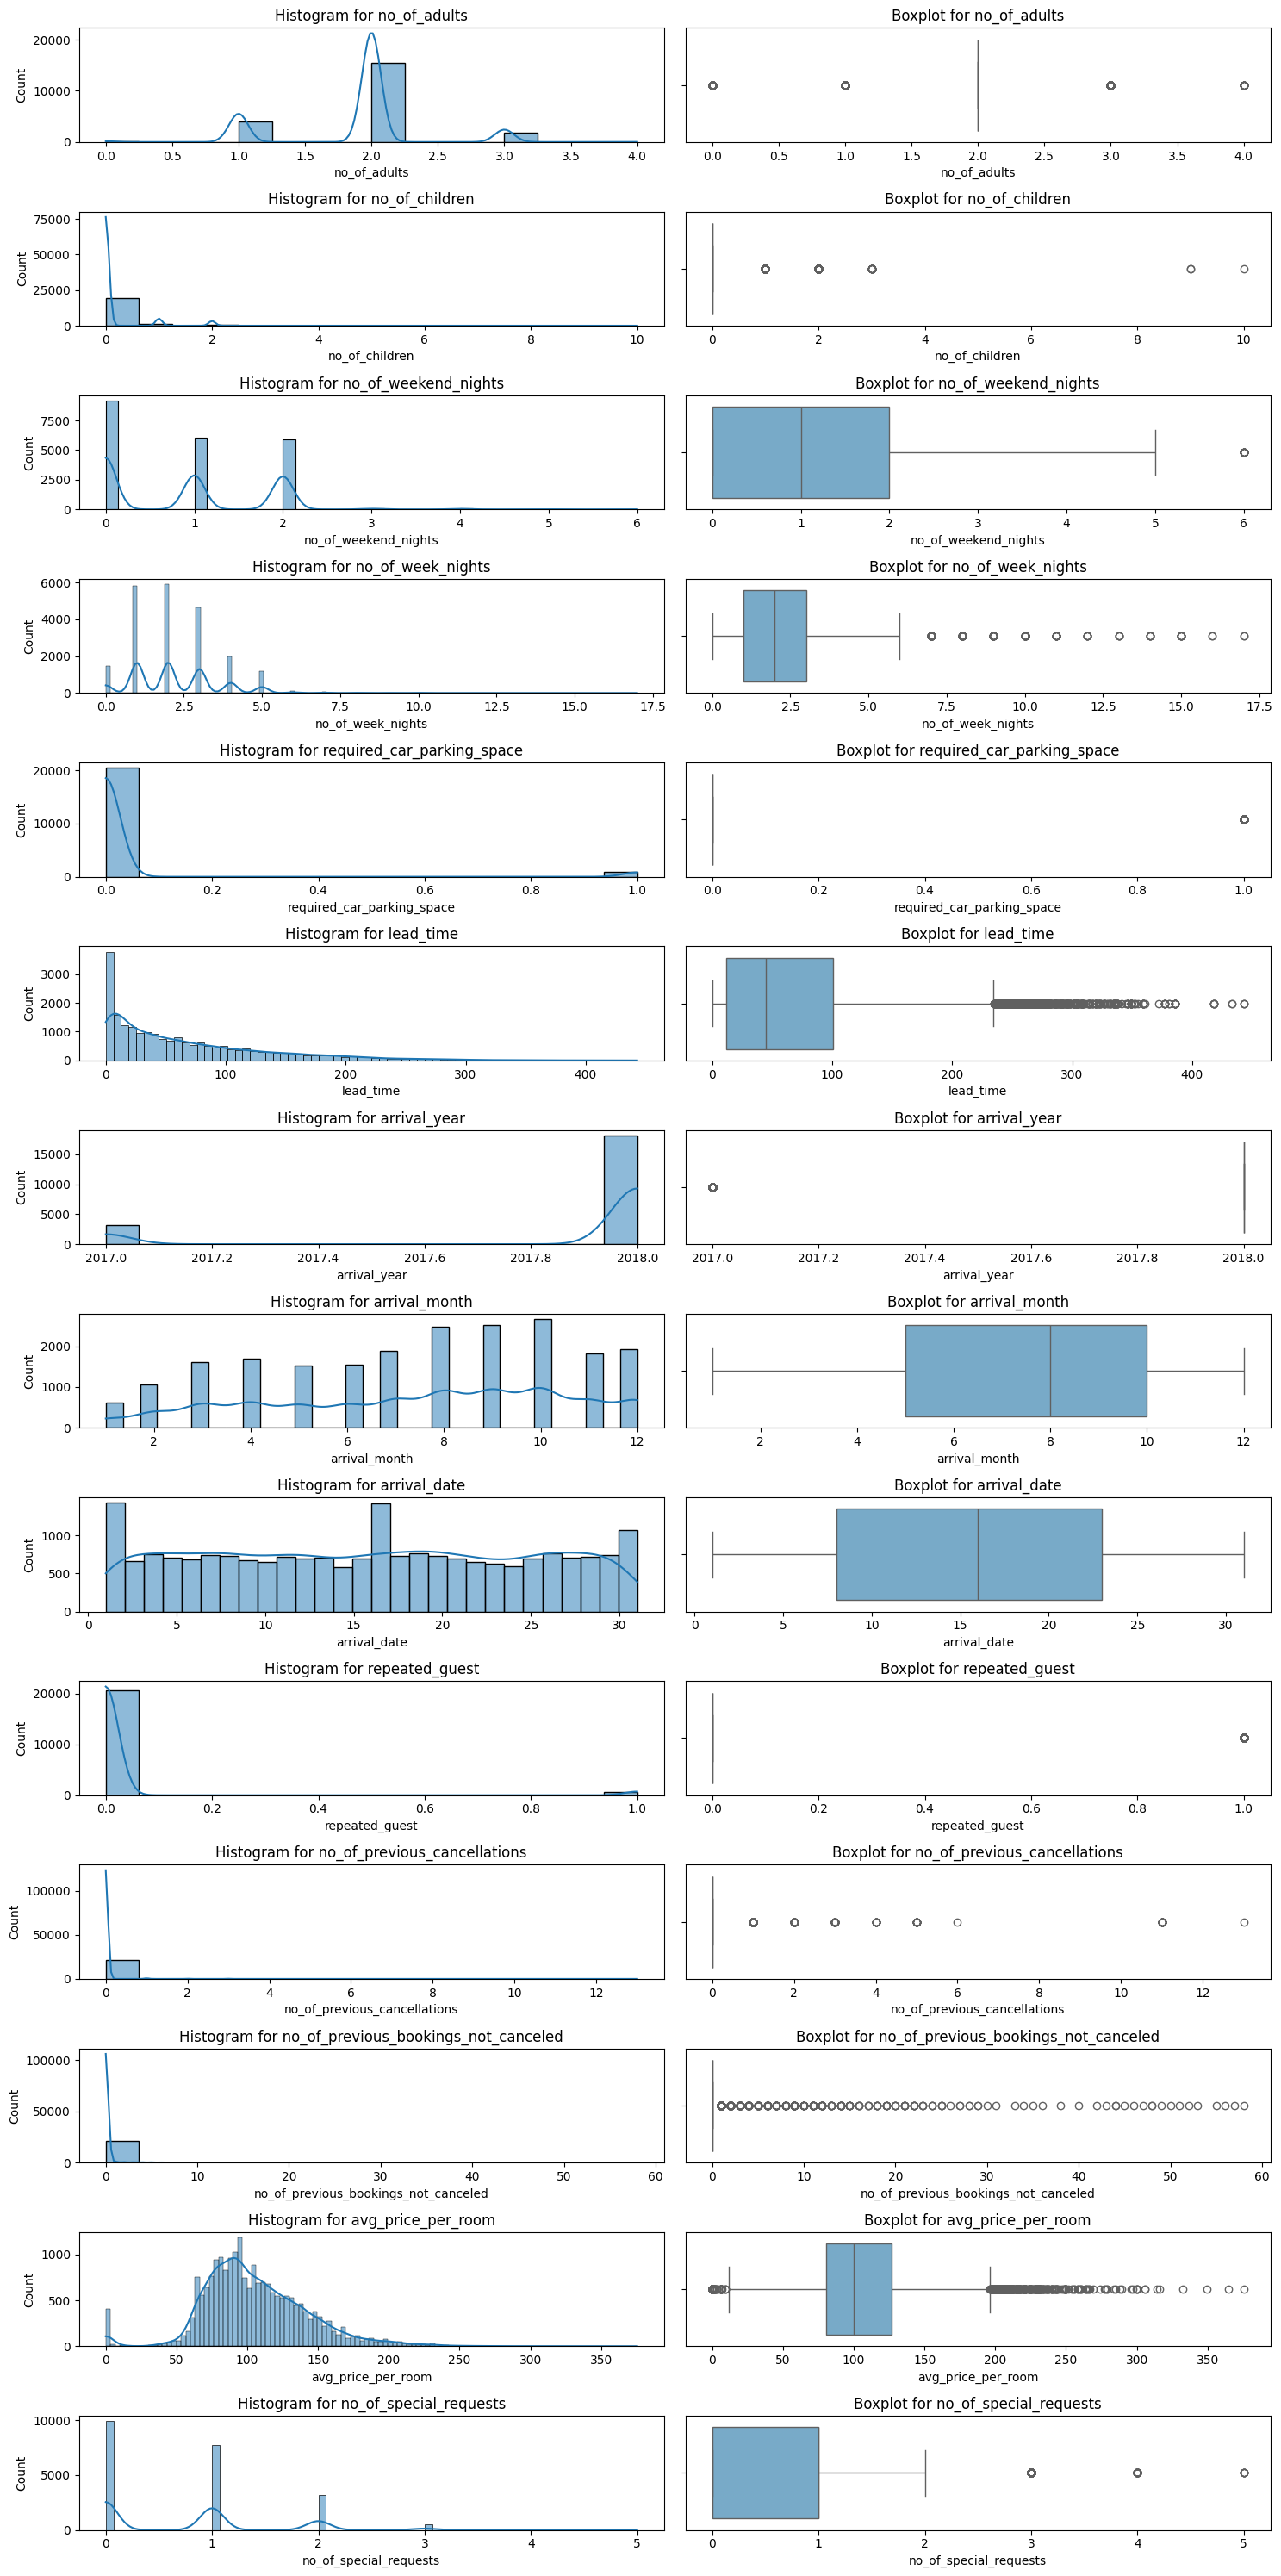

In [14]:
num_plot_dist(data,num_col)

In [15]:

def cat_plot_dist(df, col_features):
    fig, ax = plt.subplots(len(col_features), 1, figsize=(15, 5 * len(col_features)))  # dynamic height

    if len(col_features) == 1:
        ax = [ax]  # Make it iterable

    for i, feature in enumerate(col_features):
        sns.countplot(data=df, x=feature, palette="Blues", ax=ax[i])
        ax[i].set_title(f"Countplot for {feature}")
        ax[i].tick_params(axis='x', rotation=45)  # Rotate labels if needed

    plt.tight_layout()
    plt.show()


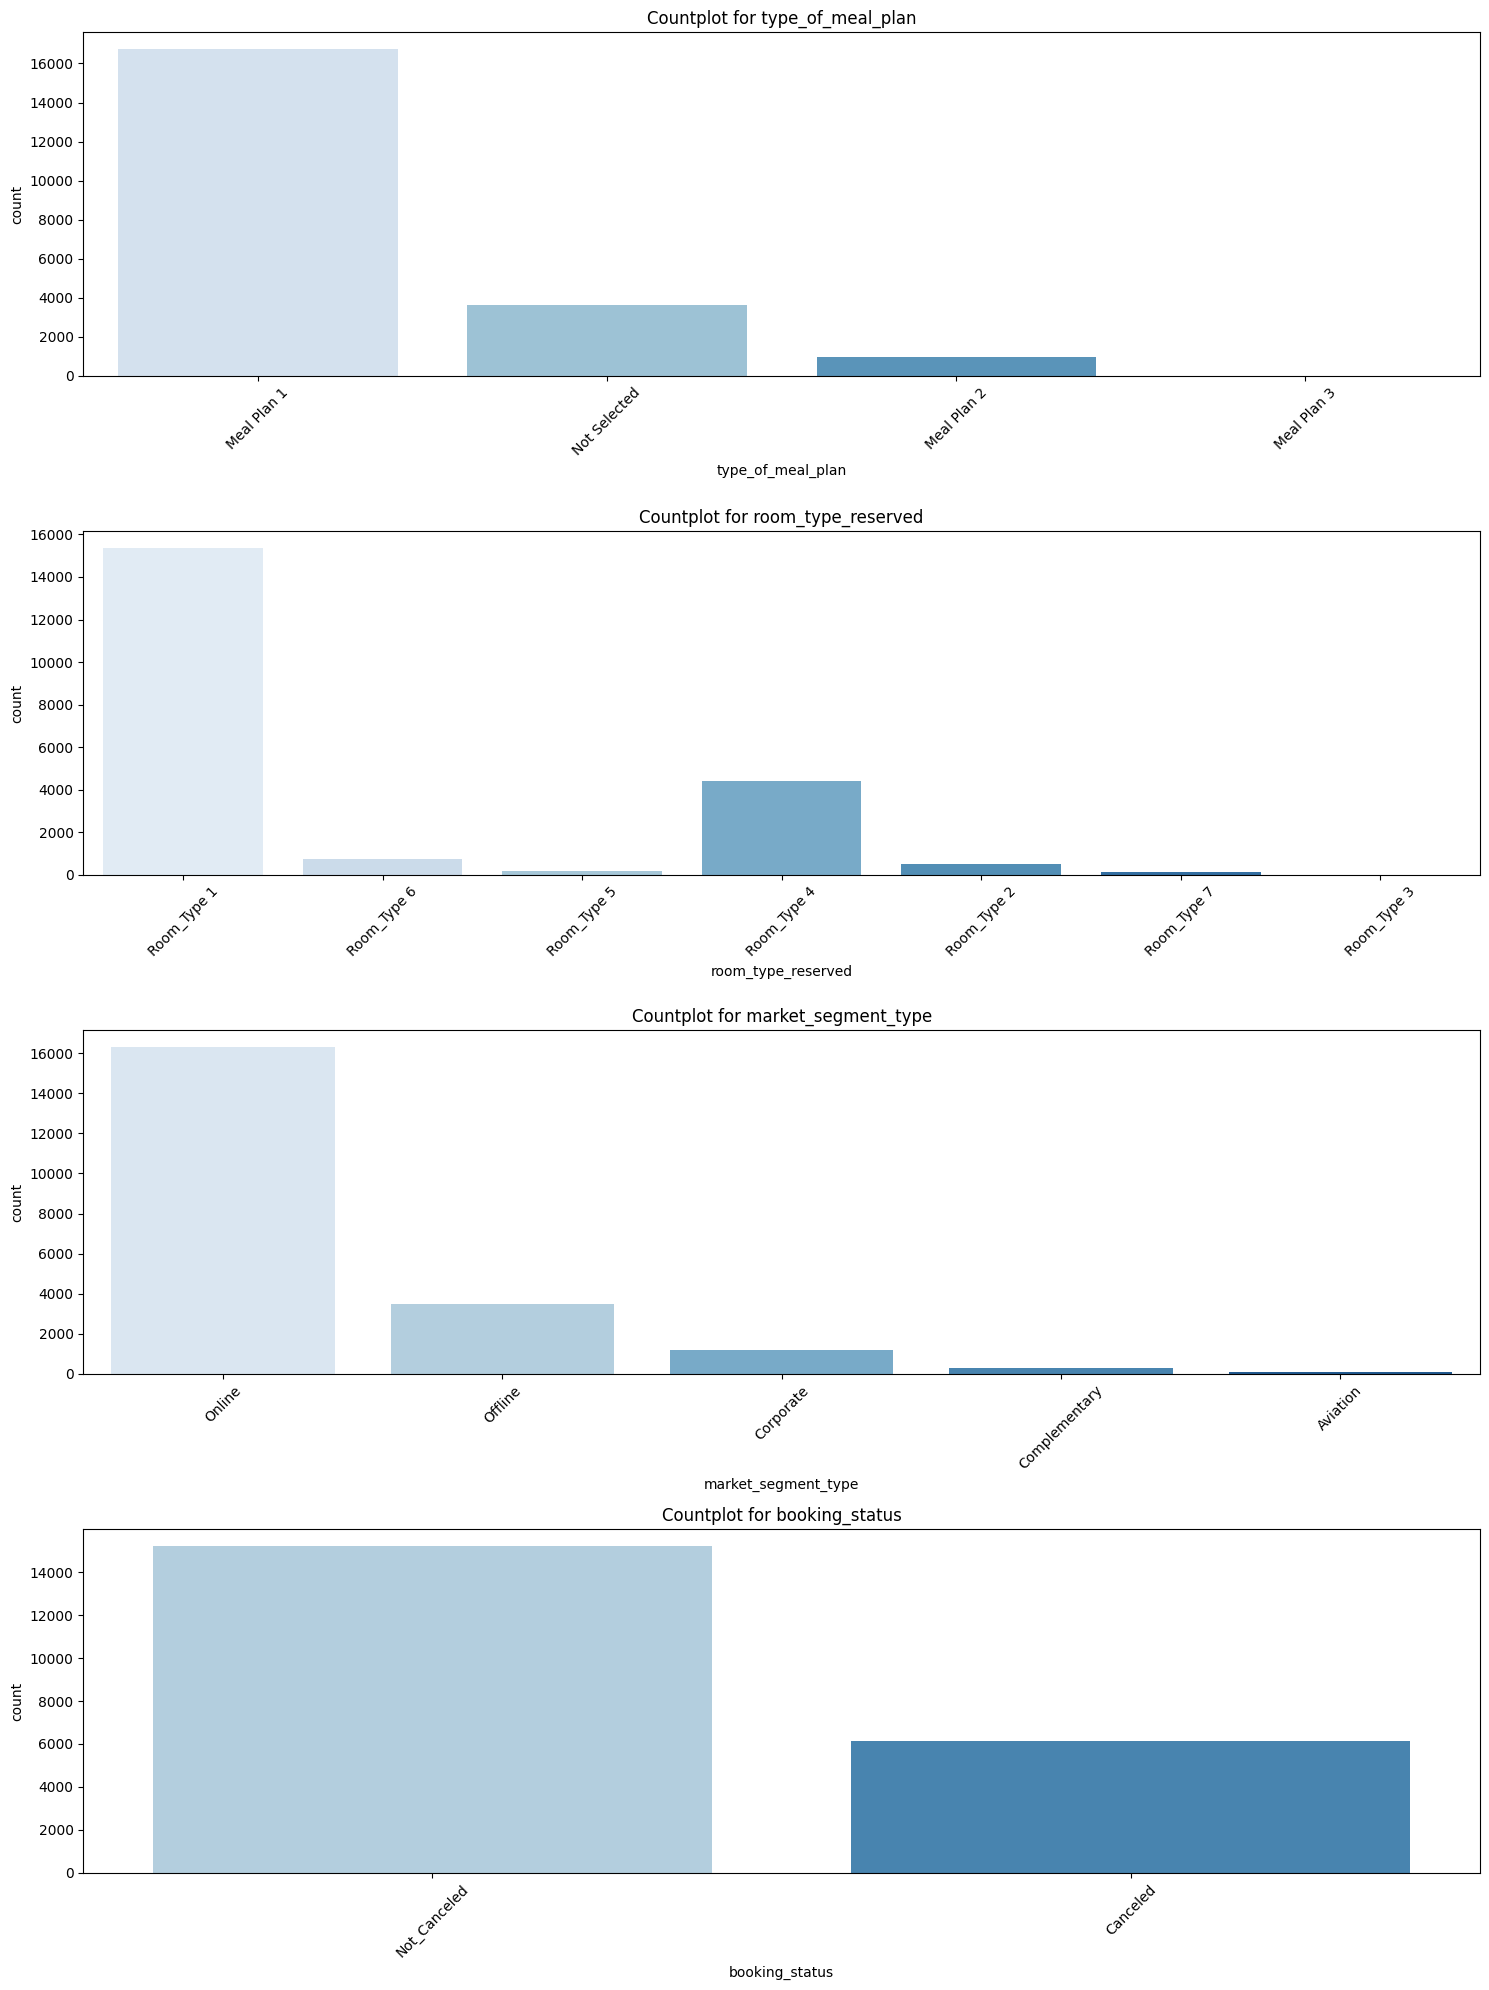

In [16]:
cat_plot_dist(data,cat_col)

## Bivaraite Analysis

#### Bivarite Analysis of num-num columns:

In [17]:
def plot_bivariate_num(df, target, num_features):
  num_plots = len(num_features)
  num_rows = (num_plots + 1) // 2

  fig, ax = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
  axes = ax.flatten()

  for i, col in enumerate(num_features):
    sns.boxplot(data=df, x=col, y=target, ax=axes[i], palette="Blues")
    axes[i].set_title(f"Boxplot Plot between {col} and {target}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)


  plt.tight_layout()
  plt.show()




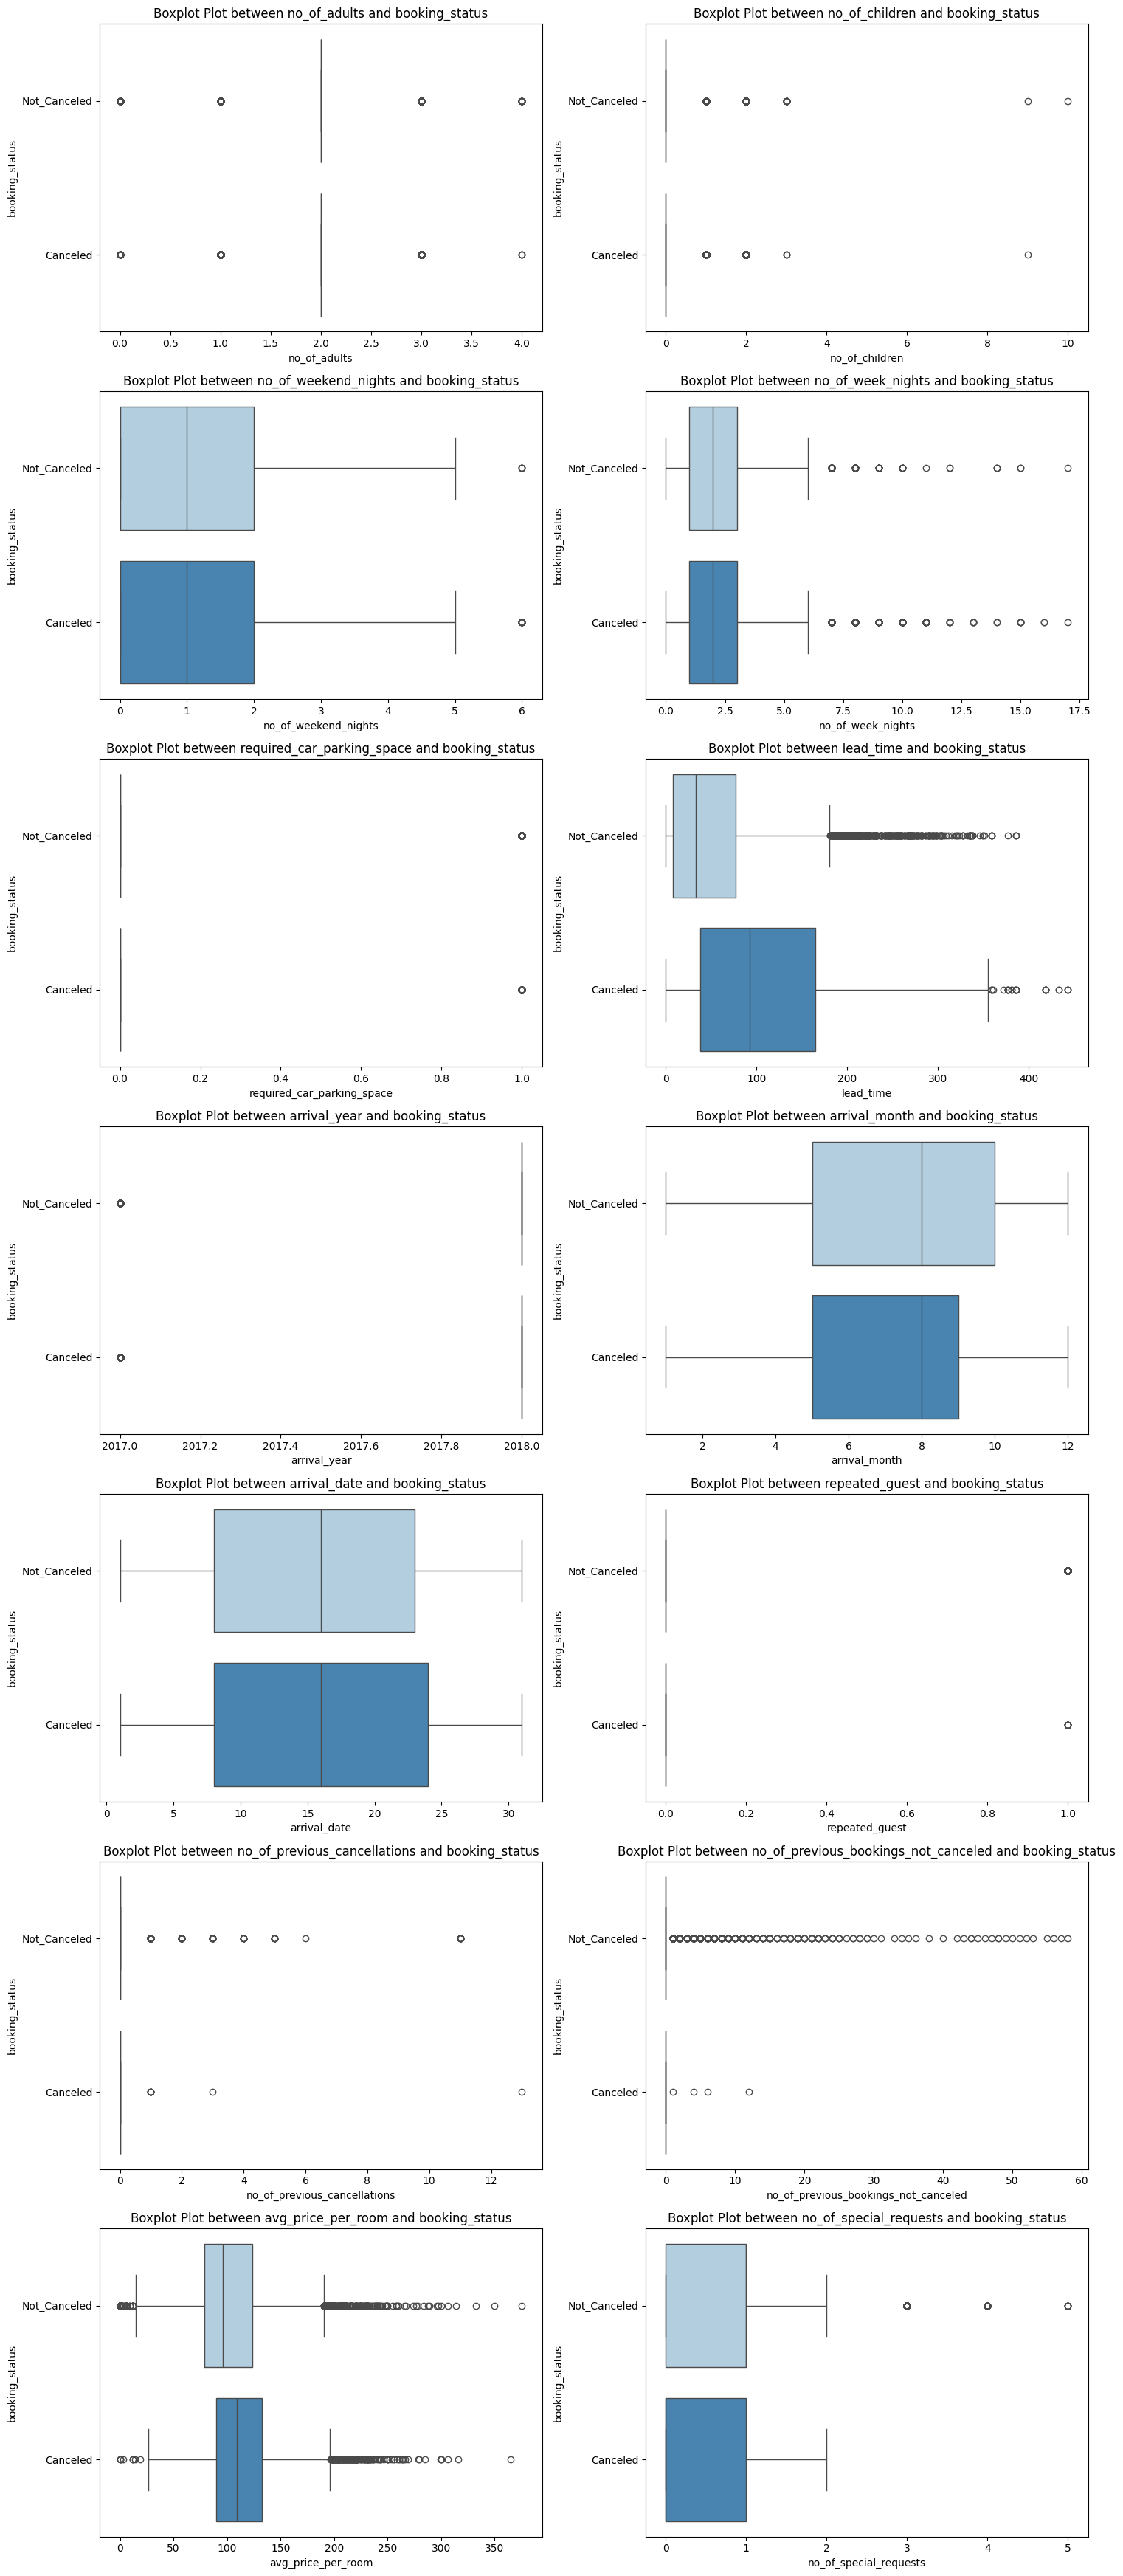

In [18]:
plot_bivariate_num(data,'booking_status',num_col)

## Bivariate analysis on categorical columns

In [19]:
def plot_bivariate_cat(df,target,cat_features):
  num_plots = len(cat_features)
  num_rows = (num_plots + 1) // 2

  fig, ax = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
  axes = ax.flatten()

  for i, col in enumerate(cat_features):
    sns.countplot(data=df, x=col, hue=target, ax=axes[i], palette="Blues")
    axes[i].set_title(f"Countplot between {col} and {target}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].tick_params(axis='x', rotation=45)

  plt.tight_layout()
  plt.show()

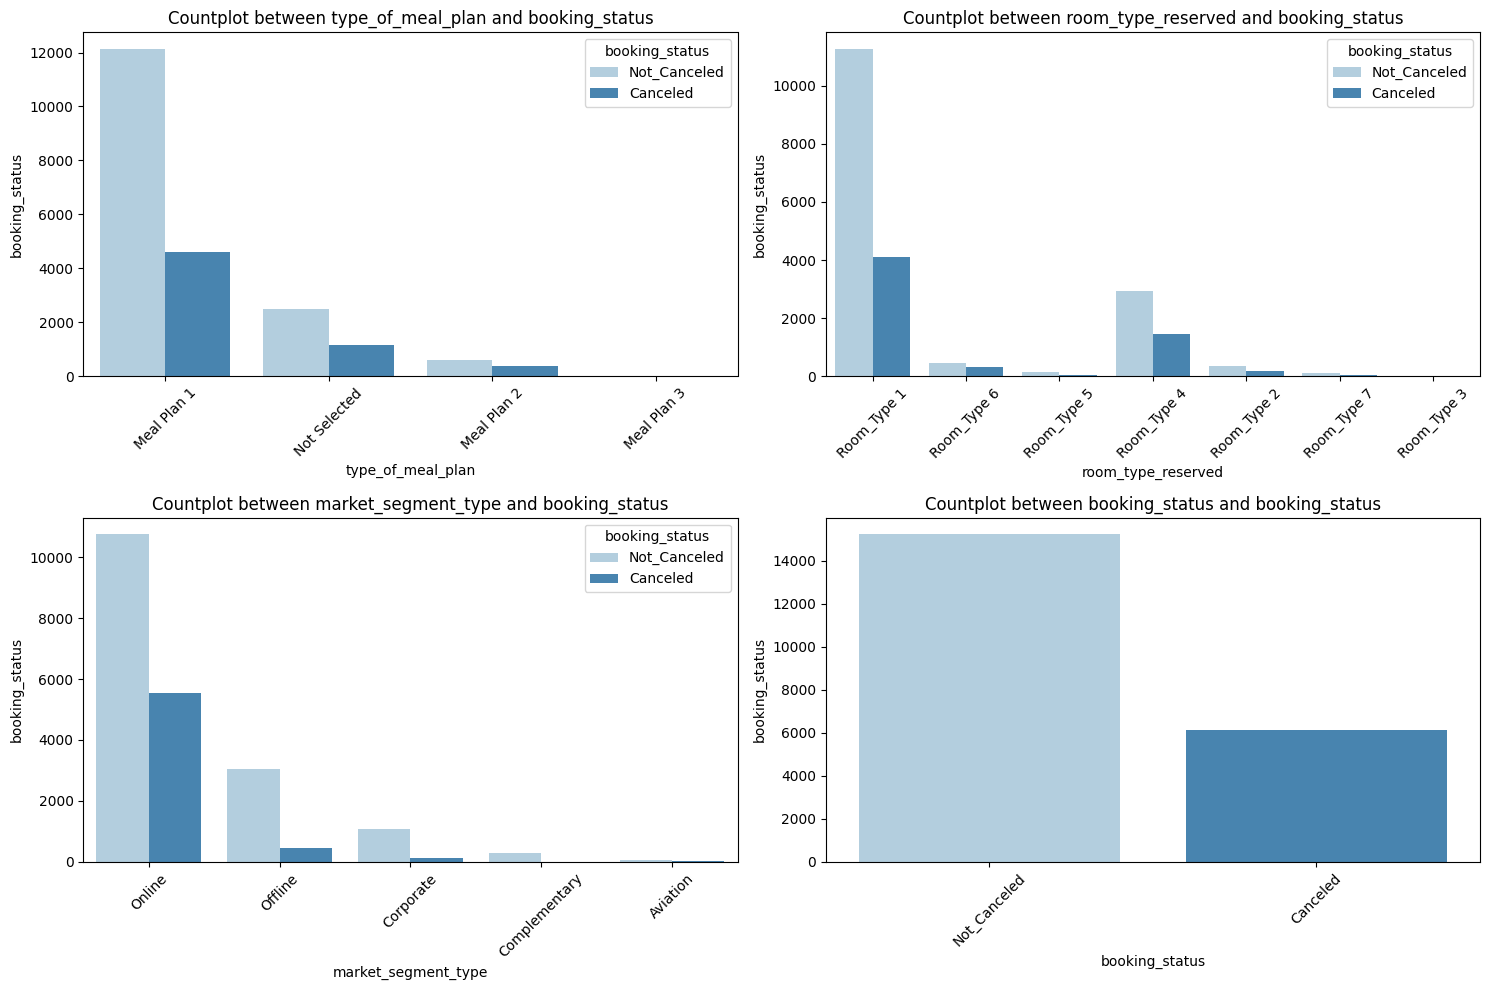

In [20]:
plot_bivariate_cat(data,'booking_status',cat_col)

# Data Processing:

In [21]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


convert the categorical column to numeric data with the help of encoding technique.

In [22]:
from sklearn.preprocessing import LabelEncoder


In [23]:
encoder = LabelEncoder()
mappings = {}
for col in cat_col:
  df[col] = encoder.fit_transform(df[col])
  mappings[col] = {label:code for label,code in zip(encoder.classes_,encoder.transform(encoder.classes_))}

In [24]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


### Multicollinearity

In [26]:
!pip install statsmodels


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [28]:
X = add_constant(df.drop('booking_status',axis=1))
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['Features'] = X.columns

In [29]:
vif

,VIF,Features
0,4.095459e+07,const
1,1.341102e+00,no_of_adults
2,1.282198e+00,no_of_children
3,1.073155e+00,no_of_weekend_nights
4,1.123170e+00,no_of_week_nights
5,1.175238e+00,type_of_meal_plan
6,1.031339e+00,required_car_parking_space
7,1.549597e+00,room_type_reserved
8,1.240608e+00,lead_time
9,1.287092e+00,arrival_year


There is no Multicollinearity in our dataset .


Check the correlation

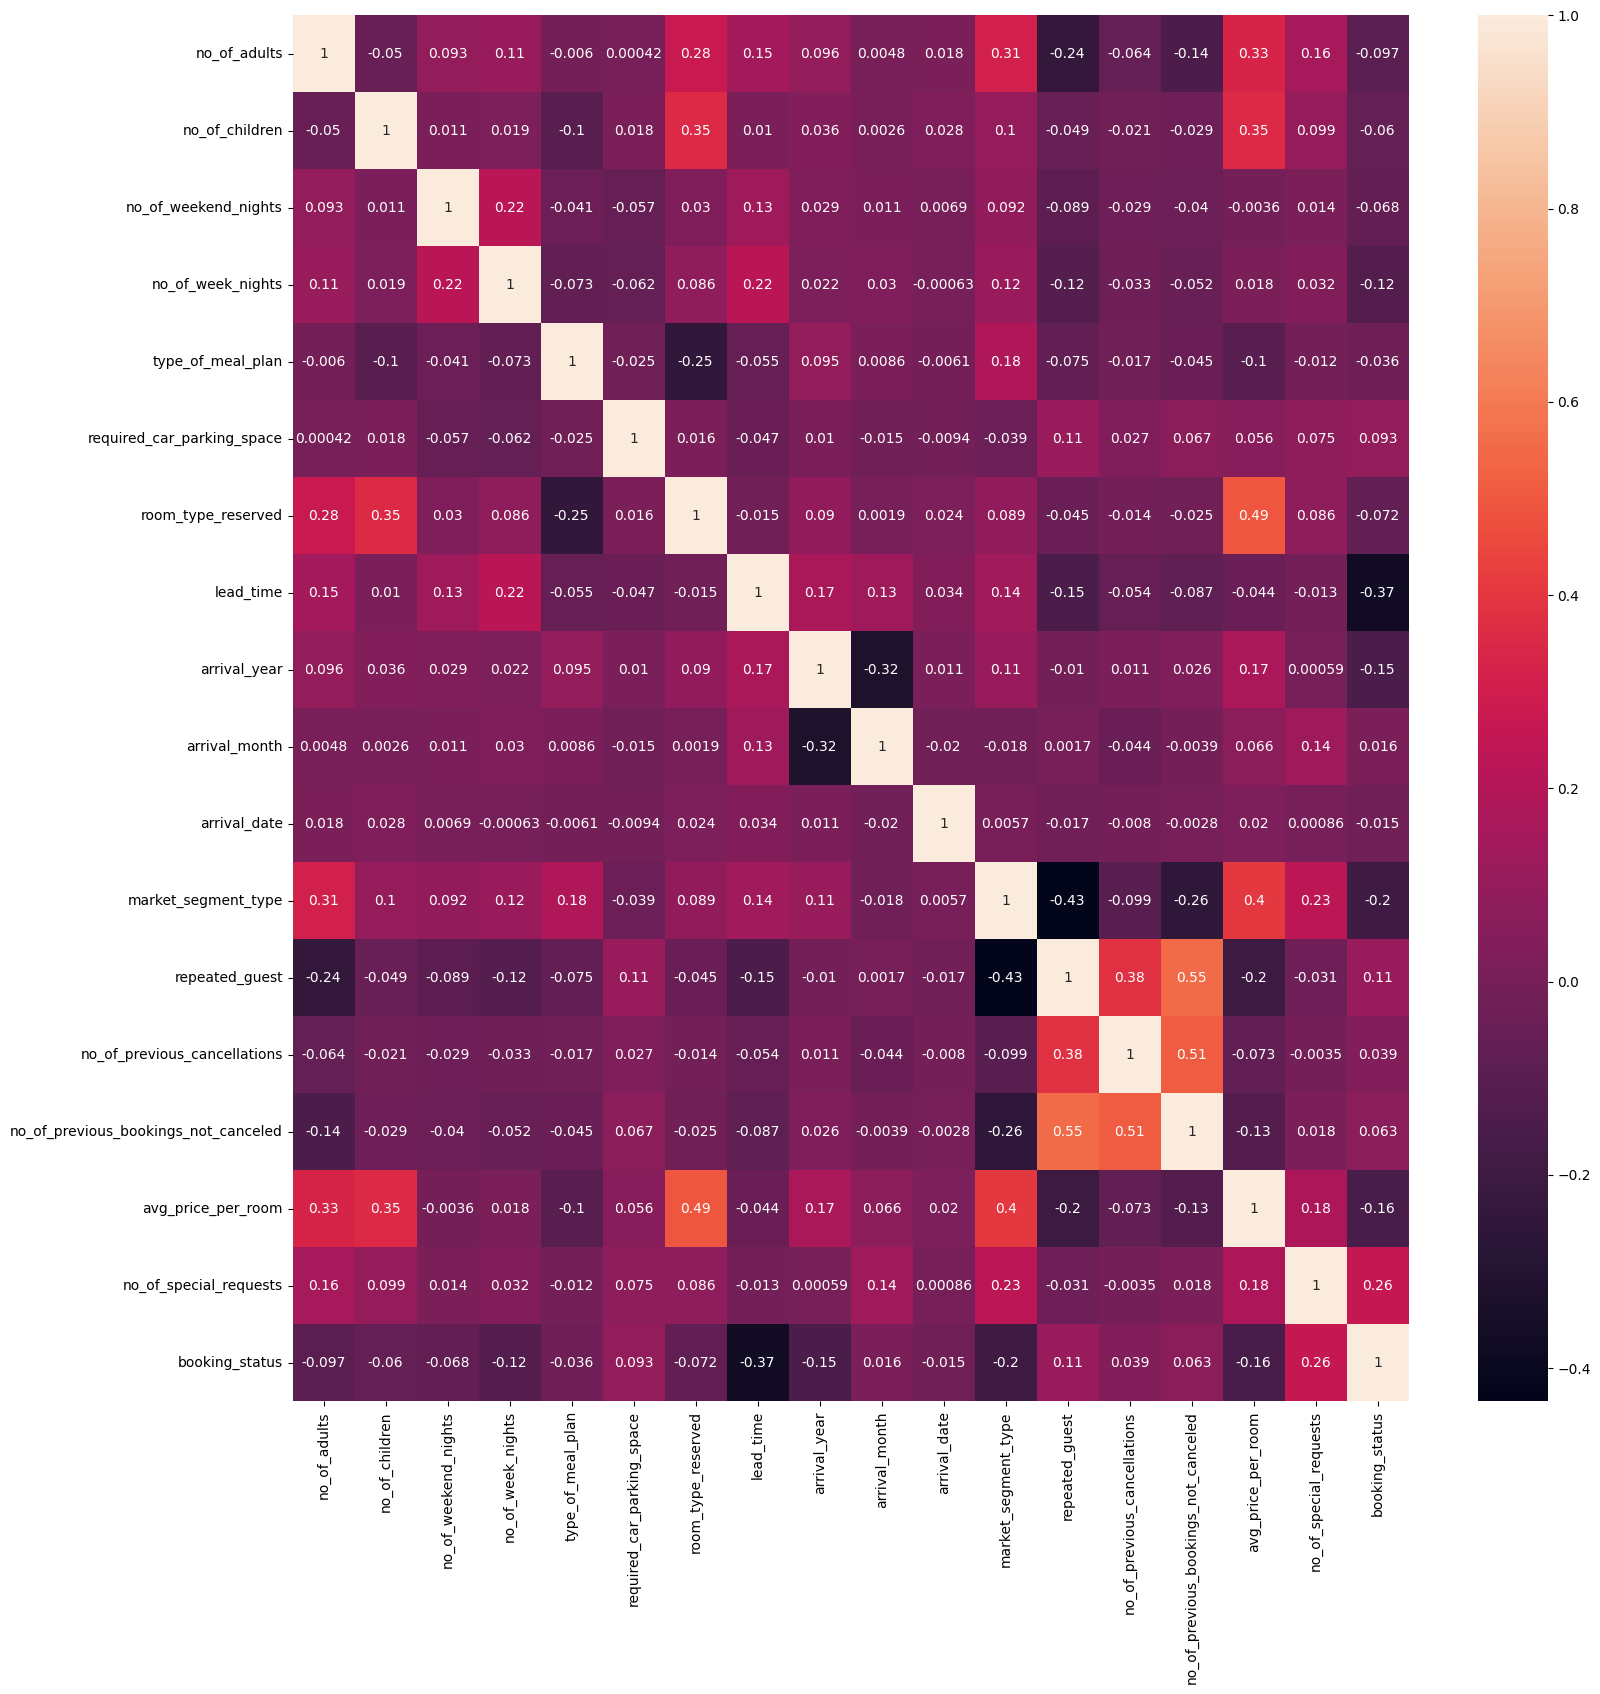

In [30]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Check the data skewness

In [31]:
skewness = df.skew()
skewness

,0
no_of_adults,-0.305652
no_of_children,4.165696
no_of_weekend_nights,0.636637
no_of_week_nights,1.553657
type_of_meal_plan,1.650716
required_car_parking_space,4.538315
room_type_reserved,1.392145
lead_time,1.405258
arrival_year,-1.953273
arrival_month,-0.293266


column no_of_previous_cancellation and no_of_previous_bookings_not_canceled are positively skewed , so we are going to do log_transformation of those columns.

In [32]:
for col in df.columns:
  if skewness[col] > 5:
    df[col] = np.log1p(df[col])


In [33]:
df.skew()

,0
no_of_adults,-0.305652
no_of_children,4.165696
no_of_weekend_nights,0.636637
no_of_week_nights,1.553657
type_of_meal_plan,1.650716
required_car_parking_space,4.538315
room_type_reserved,1.392145
lead_time,1.405258
arrival_year,-1.953273
arrival_month,-0.293266


### Imbalanced data

In [34]:
df['booking_status'].value_counts()

,count
booking_status,
1,15231
0,6128


we have 15k of not_cancelled data and 6k of concelled data which is Imbalance.It is highly Imbalance problem , we will decide whether to use undersampling or oversampling .

* If we do undersampling our dataset will reduce to 10k total which is not suitable for the learning.
* So we are going to do oversampling using SMOTE so that each class label has 15k total 30+K dataset for training.

In [35]:
X = df.drop('booking_status',axis=1)
y = df['booking_status']

In [36]:
!pip install imbalanced-learn


In [37]:
y.value_counts()

,count
booking_status,
1,15231
0,6128


In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
smote = SMOTE(random_state=42)
X_res,y_res = smote.fit_resample(X,y)

In [40]:
y_res.value_counts()

,count
booking_status,
1,15231
0,15231


In [41]:
balanced_df = pd.concat([X_res,y_res],axis=1)
balanced_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0,0


In [42]:
new_df = balanced_df.copy()
new_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.000000,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.500000,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.000000,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.250000,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30457,2,0,0,2,1,0,0,265,2018,6,24,3,0.0,0.0,0.0,111.037207,0,0
30458,1,0,1,3,0,0,0,103,2018,4,18,3,0.0,0.0,0.0,72.250000,0,0
30459,2,0,1,2,1,0,0,27,2018,6,12,4,0.0,0.0,0.0,104.556265,0,0
30460,1,0,1,1,3,0,0,46,2018,4,4,4,0.0,0.0,0.0,107.100000,0,0


In [43]:
new_df.shape


(30462, 18)

#### Feature Selection

In [44]:
len(new_df.columns)

18

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
X = new_df.drop('booking_status',axis=1)
y = new_df['booking_status']

In [47]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [48]:
feature_importance = model.feature_importances_

In [49]:
feature_importance_df = pd.DataFrame({'Feature':X.columns,'Importance':feature_importance})

In [50]:
top_features_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)
top_features_importance_df

,Feature,Importance
7,lead_time,0.260226
16,no_of_special_requests,0.183688
15,avg_price_per_room,0.150109
9,arrival_month,0.085296
10,arrival_date,0.084464
11,market_segment_type,0.057997
3,no_of_week_nights,0.044419
2,no_of_weekend_nights,0.030316
4,type_of_meal_plan,0.020648
6,room_type_reserved,0.020059


In [51]:
top_10_feature = top_features_importance_df['Feature'].head(10).values
top_10_df = new_df[top_10_feature.tolist() + ['booking_status']]

In [52]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [53]:
df = top_10_df.copy()

## Model Selection

In [54]:
!pip install xgboost lightgbm

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [56]:
X = df.drop('booking_status',axis=1)
y = df['booking_status']

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [58]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}


In [59]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Recall": [],
    "Precision": [],
    "F1 Score": []
}


In [60]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)

    ## Check the metric
    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Recall"].append(recall)
    metrics["Precision"].append(precision)
    metrics["F1 Score"].append(f1)





[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [61]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.774331,0.731922,0.802787,0.765718
1,Decision Tree,0.840801,0.830619,0.850000,0.840198
2,Random Forest,0.891679,0.892508,0.892508,0.892508
3,Gradient Boosting,0.837190,0.864821,0.821473,0.842590
4,AdaBoost,0.804202,0.781433,0.821294,0.800868
5,SVM,0.720335,0.706840,0.729657,0.718068
6,Naive Bayes,0.773346,0.728664,0.803232,0.764133
7,K-Nearest Neighbors,0.779583,0.675896,0.856376,0.755507
8,XGBoost,0.870343,0.878176,0.866324,0.872210
9,LightGBM,0.866732,0.890879,0.851494,0.870742


##### Train Our Model with Random Forest

In [62]:
# Perform hyperparameter Tunning for RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [63]:
X = df.drop('booking_status',axis=1)
y = df['booking_status']

In [64]:
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
rf = RandomForestClassifier(random_state=42)

In [66]:
param_dist = {
    'n_estimators':randint(100,500),
    'max_depth':randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True,False],
}


In [69]:
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   scoring='accuracy'
                                  )

In [70]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   7.2s
[CV

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3a241e9490>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3a2d13fdd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3a53842550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e3a23930c50>},
                   random_state=42, scoring='accuracy', verbose=2)

In [71]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [72]:
best_rf_model = random_search.best_estimator_

In [73]:
y_pred = best_rf_model.predict(X_test)

In [75]:
## Check the metric
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)



Accuracy: 0.8959461677334646
Recall: 0.8993485342019544
Precision: 0.8946856772521062
F1 Score: 0.8970110461338532


In [76]:
#Save model
import joblib

In [77]:
joblib.dump(best_rf_model,'random_forest_model.pkl')

['random_forest_model.pkl']

In [78]:
loaded_model = joblib.load('random_forest_model.pkl')

In [79]:
X_train[:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [80]:
new_data = np.array([190,	1,	93.5,	9,	8,	4,	5,	2,	0,	0,
])

In [81]:
loaded_model.predict(new_data.reshape(1,-1))

array([1])

In [82]:
y[0]

np.int64(1)